<a href="https://colab.research.google.com/github/aasthagoyal46/ImageClassification/blob/master/ImageClassificationLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import time
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [0]:
X, y = fetch_openml('CIFAR_10_small', version='active', return_X_y=True)

In [0]:
X.shape

(20000, 3072)

In [0]:
y.shape

(20000,)

In [0]:
images = X.reshape(20000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")

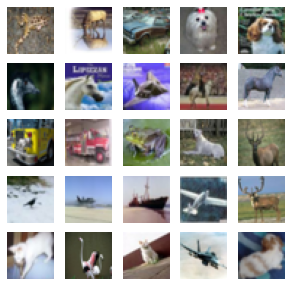

In [0]:
fig, axes = plt.subplots(5,5,figsize=(5,5))
for j in range(5):
    for k in range(5):
        i = np.random.choice(range(len(X)))
        axes[j][k].set_axis_off()
        axes[j][k].imshow(images[i])

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [0]:
C = [0.0001, 0.0005, 0.001, 0.01, 1, 10, 100]
LR1=[]
trainError=[]
testError=[]
for i in range(len(C)):
  LR1.append(LogisticRegression(multi_class="multinomial", solver="saga", penalty="l1", C=C[i]))
  LR1[i].fit(X_train, Y_train)
  LR1[i].predict_proba(X_test)
  trainError.append(LR1[i].score(X_train, Y_train))
  testError.append(LR1[i].score(X_test, Y_test))
  print("For C "+str(C[i]))
  print(trainError[i])
  print(testError[i])

C:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


For C 0.0001
0.36493333333333333
0.3504


C:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


For C 0.0005
0.43733333333333335
0.396


C:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


For C 0.001
0.46073333333333333
0.401


C:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


For C 0.01
0.5083333333333333
0.3916


C:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


For C 1
0.5132666666666666
0.3836


C:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


For C 10
0.513
0.3842


C:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


For C 100
0.5137333333333334
0.383


In [0]:
testError

[0.3504, 0.396, 0.401, 0.3916, 0.3836, 0.3842, 0.383]

In [0]:
trainError

[0.36493333333333333,
 0.43733333333333335,
 0.46073333333333333,
 0.5083333333333333,
 0.5132666666666666,
 0.513,
 0.5137333333333334]

In [0]:
C2 = [0.0001, 0.001, 0.01, 1, 10]
LR2=[]
trainError2=[]
testError2=[]
for i in range(len(C2)):
  LR2.append(LogisticRegression(multi_class="multinomial", solver="saga", penalty="l2", C=C2[i]))
  LR2[i].fit(X_train, Y_train)
  LR2[i].predict_proba(X_test)
  trainError2.append(LR2[i].score(X_train, Y_train))
  testError2.append(LR2[i].score(X_test, Y_test))
  print("For C "+str(C2[i]))
  print(trainError2[i])
  print(testError2[i])

C:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


For C 0.0001
0.5135333333333333
0.3838


C:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


For C 0.001
0.5138
0.3836


C:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


For C 0.01
0.5136
0.3836


C:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


For C 1
0.5135333333333333
0.3832
For C 10
0.5137333333333334
0.3834


C:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [0]:
trainError2

[0.5135333333333333, 0.5138, 0.5136, 0.5135333333333333, 0.5137333333333334]

In [0]:
testError2

[0.3838, 0.3836, 0.3836, 0.3832, 0.3834]

Text(0, 0.5, 'Training Accuracy')

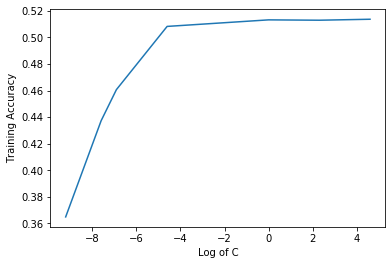

In [0]:
plt.plot(np.log(C), trainError)
plt.xlabel("Log of C")
plt.ylabel("Training Accuracy")

Text(0, 0.5, 'Testing Accuracy')

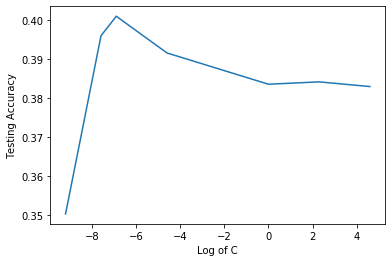

In [0]:
plt.plot(np.log(C), testError)
plt.xlabel("Log of C")
plt.ylabel("Testing Accuracy")